# **Project 5**

# Australia Car Market Data

# Questions
1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?

2) How does the condition of a car (Status) affect its price?

3) Is there a correlation between mileage (Kilometers) and the price of a car?

4) How does engine capacity (CC) relate to car price and mileage?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("cars_info.csv")
data.head(3)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8


In [4]:
data.describe()

,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [7]:
data.shape

(17048, 16)

In [8]:
data.isnull().sum()

,0
ID,0
Name,0
Price,0
Brand,0
Model,0
Variant,0
Series,0
Year,0
Kilometers,0
Type,0


# 1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?

In [16]:
data1 = data.groupby("Brand")["Price"].mean().reset_index()
data1

,Brand,Price
0,Abarth,37493.800000
1,Alfa Romeo,49282.545455
2,Aston Martin,235120.000000
3,Audi,52605.027027
4,BMW,56373.000000
5,Bentley,181405.428571
6,Chery,8749.500000
7,Chevrolet,145833.857143
8,Chrysler,35253.595238
9,Citroen,24233.384615


In [12]:
average = data1.groupby('Brand').mean()
average = average.sort_values(by='Price',ascending=False)
print(average)

                         Price
Brand                         
Lamborghini      452923.333333
Aston Martin     235120.000000
Bentley          181405.428571
Porsche          153987.835165
Chevrolet        145833.857143
Ram              105055.956522
FPV               91490.000000
Maserati          84859.750000
HSV               74036.162162
Genesis           64888.000000
Land Rover        64485.186813
Mercedes-Benz     63490.852800
Cupra             62334.200000
Jaguar            61976.394737
BMW               56373.000000
Iveco             52990.000000
Audi              52605.027027
Volvo             52159.484472
Lexus             50281.566667
Alfa Romeo        49282.545455
Hino              46500.000000
Isuzu             42962.951311
Toyota            40719.680997
Jeep              39098.102902
GWM               38250.793103
Volkswagen        38100.763494
Skoda             37865.675000
LDV               37798.696721
Abarth            37493.800000
Ford              36091.152349
Chrysler

In [17]:
average = data.groupby("Brand")["Price"].mean().reset_index()
sorted = average.sort_values(by='Price', ascending=False)


highest = sorted.iloc[0]
lowest = sorted.iloc[-1]

print(f"{highest['Brand']} Brand car with highest average price is {highest['Price']}")
print(f"{lowest['Brand']} Brand car with lowest average price is {lowest['Price']}")

Lamborghini Brand car with highest average price is 452923.3333333333
Saab Brand car with lowest average price is 8435.0


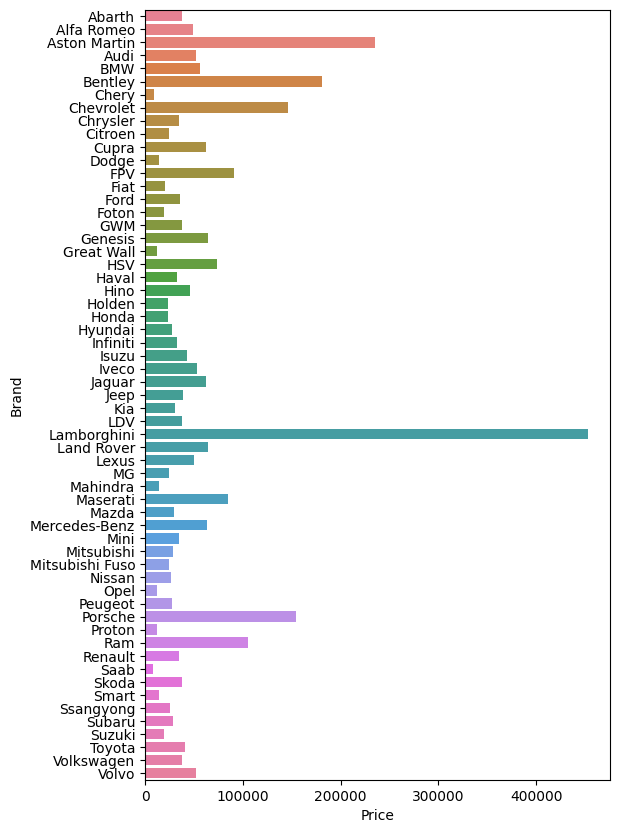

In [19]:
plt.figure(figsize = (6,10))
sns.barplot(data = data1,x = "Price",y = "Brand",hue = "Brand")
plt.show()



# 2) How does the condition of a car (Status) affect its price?

In [21]:
data.head(1)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5


In [22]:
df = data[["Name","Status","Price"]].value_counts().reset_index()
df1 = df
df1


,Name,Status,Price,count
0,2021 MG ZS Excite AZS1 MY21,Used,21990,14
1,2021 MG MG3 Auto Core SZP1 MY21,Used,16990,9
2,2021 MG HS Core SAS23 MY21,Used,27990,7
3,2020 Kia Cerato S BD MY20,Used,22990,7
4,2022 Renault Koleos Intens (4X2) XZG MY22,New In Stock,51143,7
...,...,...,...,...
16367,2014 Mitsubishi Triton GLX (4X4) MN MY15,Used,27995,1
16368,2014 Mitsubishi Triton GLX (4X4) MN MY15,Used,29215,1
16369,2014 Mitsubishi Triton GLX (4X4) MN MY15,Used,30260,1
16370,2014 Mitsubishi Triton GLX MN MY15,Used,21950,1


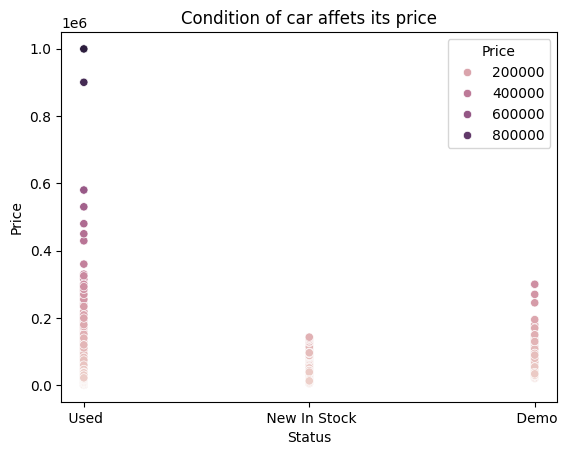

In [24]:
sns.scatterplot(data = df1,x = "Status",y = "Price",hue = "Price")
plt.title("Condition of car affets its price")
plt.show()



# 3) Is there a correlation between mileage (Kilometers) and the price of a car?

In [25]:
data.head(1)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5


In [30]:
corr = data[['Kilometers','Price']].corr()

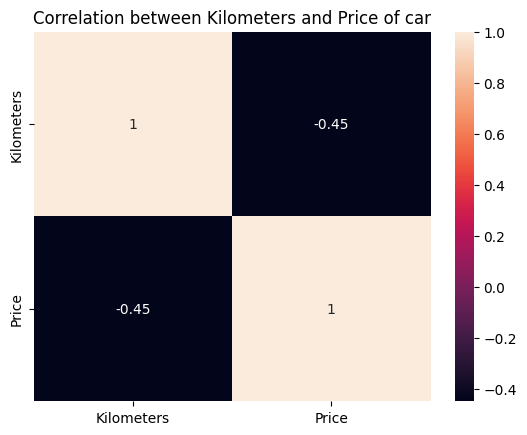

In [31]:
sns.heatmap(corr,annot= True)
plt.title("Correlation between Kilometers and Price of car")
plt.show()

# 4) How does engine capacity (CC) relate to car price and mileage?

In [32]:
df1 = data[["CC","Price"]].value_counts().reset_index()
df2 = df1
df2

,CC,Price,count
0,1999,22990,28
1,1999,28990,25
2,1999,27990,22
3,1999,24990,21
4,1999,26990,20
...,...,...,...
11915,1998,63890,1
11916,1998,63900,1
11917,1998,63999,1
11918,1998,64500,1


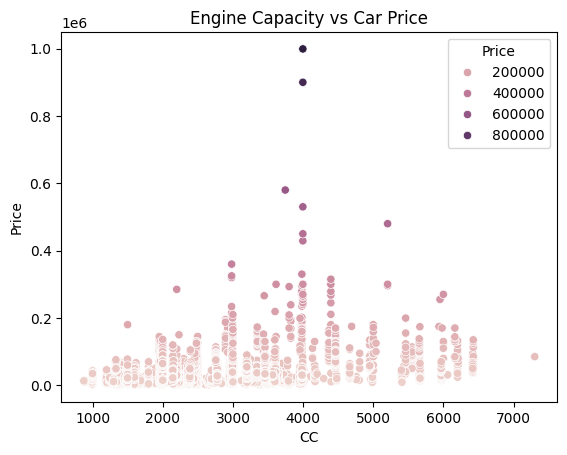

In [33]:
sns.scatterplot(data=df2, x="CC", y="Price",hue = "Price")
plt.title('Engine Capacity vs Car Price')
plt.show()



In [34]:
df1 = data[["CC","Kilometers"]].value_counts().reset_index()
df2 = df1
df2

,CC,Kilometers,count
0,2488,10,25
1,1998,10,16
2,1996,10,15
3,1984,15,13
4,1333,8,12
...,...,...,...
16600,1998,19000,1
16601,1998,19009,1
16602,1998,19215,1
16603,1998,19400,1


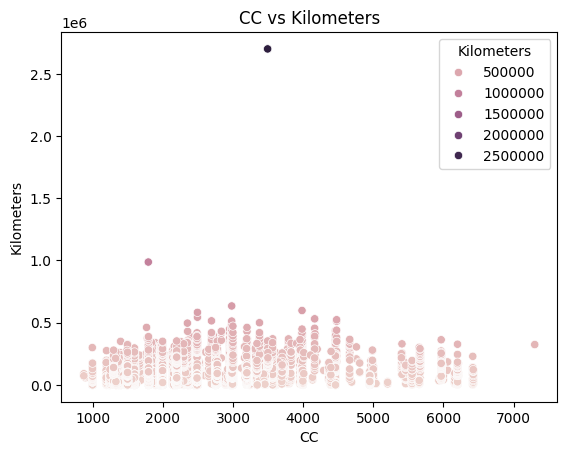

In [36]:
sns.scatterplot(data=df2,x = "CC",y = "Kilometers",hue = "Kilometers")
plt.title("CC vs Kilometers")
plt.show()

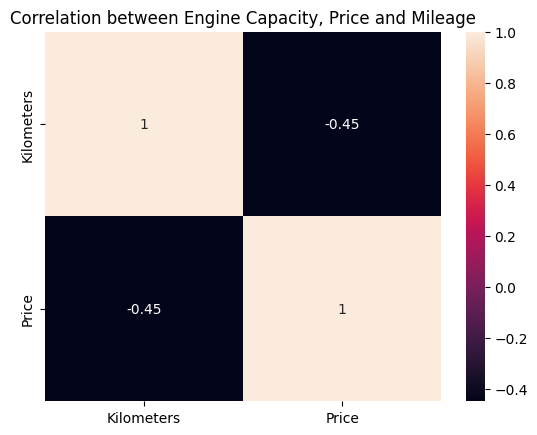

In [37]:
sns.heatmap(corr, annot=True)
plt.title("Correlation between Engine Capacity, Price and Mileage")
plt.show()
